In [43]:
import pandas as pd


In [44]:
test=pd.read_csv("/Users/dukeglacia/OneDrive - University Of Cambridge/Jupyter_Notebooks/Work_Related/test (1).csv")
test_shape=test.shape
print(test_shape)



(418, 11)


In [45]:
train=pd.read_csv("/Users/dukeglacia/OneDrive - University Of Cambridge/Jupyter_Notebooks/Work_Related/train (1).csv")
train_shape=train.shape
print(train_shape)

(891, 12)


In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


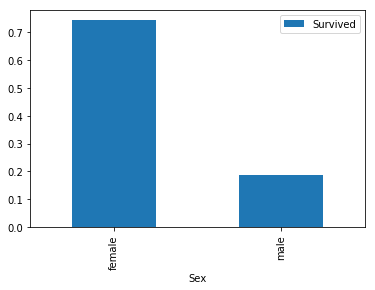

In [47]:
import matplotlib.pyplot as plt

sex_pivot=train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()


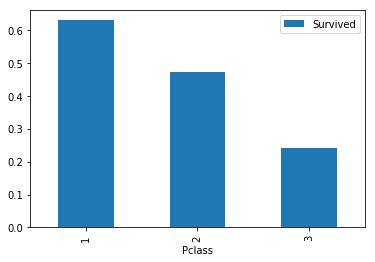

In [48]:
sex_pivot=train.pivot_table(index="Pclass",values="Survived")
sex_pivot.plot.bar()
plt.show()

In [49]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

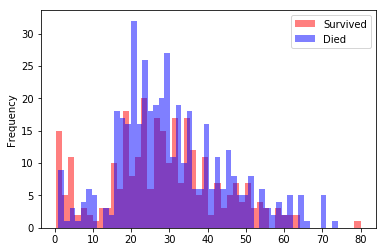

In [50]:
survived=train[train["Survived"]==1]
died=train[train["Survived"]==0]
survived["Age"].plot.hist(alpha=0.5,color="red",bins=50)
died["Age"].plot.hist(alpha=0.5,color="Blue",bins=50)
plt.legend(['Survived','Died'])
plt.show()

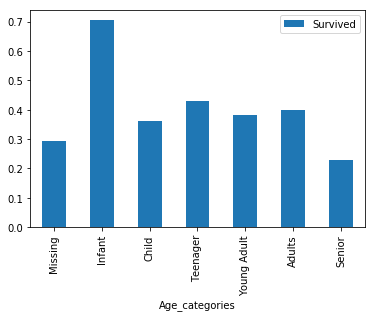

In [51]:
def process_age(df,cut_points,label_names):
    df["Age"]=df["Age"].fillna(-0.5)
    df["Age_categories"]=pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points=[-1,0,5,12,18,35,60,100]
label_names=["Missing","Infant","Child","Teenager","Young Adult","Adults","Senior"]

train=process_age(train,cut_points,label_names)
test=process_age(test,cut_points,label_names)

data=train.pivot_table(index="Age_categories",values="Survived")
data.plot.bar()
plt.show()

In [52]:
train["Age_categories"].head(200)

0      Young Adult
1           Adults
2      Young Adult
3      Young Adult
4      Young Adult
5          Missing
6           Adults
7           Infant
8      Young Adult
9         Teenager
10          Infant
11          Adults
12     Young Adult
13          Adults
14        Teenager
15          Adults
16          Infant
17         Missing
18     Young Adult
19         Missing
20     Young Adult
21     Young Adult
22        Teenager
23     Young Adult
24           Child
25          Adults
26         Missing
27     Young Adult
28         Missing
29         Missing
          ...     
170         Senior
171         Infant
172         Infant
173    Young Adult
174         Adults
175       Teenager
176        Missing
177         Adults
178    Young Adult
179         Adults
180        Missing
181        Missing
182          Child
183         Infant
184         Infant
185        Missing
186        Missing
187         Adults
188         Adults
189         Adults
190    Young Adult
191    Young

In [53]:
train["Pclass"].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [54]:
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df

train=create_dummies(train,"Pclass")
test=create_dummies(test,"Pclass")
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1


In [55]:
train=create_dummies(train,"Sex")
test=create_dummies(test,"Sex")

train=create_dummies(train,"Age_categories")
test=create_dummies(test,"Age_categories")

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adults,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,1,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,1,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,1,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,1,0,0,0,0,0,1,0,0


In [56]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adults',
       'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adults',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [78]:
lr.fit(train_X,train_y)
predictions=lr.predict(test_X)

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

xgb2 = xgb.XGBClassifier()

g.fit(train_X,train_y)
predi=g.predict(test_X)

rf = RandomForestClassifier()
rf.fit(train_X,train_y)
rf.score(test_X, test_y)

0.82122905027932958

In [79]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_y,predictions)
print(accuracy)

accuracy_2=accuracy_score(test_y,predi)
print(accuracy_2)

0.810055865922
0.821229050279


In [60]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(test_y,predictions)
pd.DataFrame(conf_matrix,columns=[['Survived','Died']],index=[['Survived','Died']])

,Survived,Died
Survived,96,14
Died,20,49


In [61]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr=LogisticRegression()
scores=cross_val_score(lr,all_X,all_y,cv=18)
print(scores)
np.mean(scores)



[ 0.76        0.84        0.78        0.86        0.8         0.8         0.9
  0.84        0.78        0.75510204  0.81632653  0.73469388  0.7755102
  0.75510204  0.81632653  0.83673469  0.7755102   0.81632653]


0.80231292517006791

In [84]:
xgb2.fit(all_X,all_y)
holdout_predictions=lr.predict(holdout[columns])
holdout_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [85]:
holdout_ids=holdout["PassengerId"]
submission_df={"PassengerId":holdout_ids,
               "Survived":holdout_predictions}
submission=pd.DataFrame(submission_df)



In [86]:
submission.to_csv('titanic_submission_kiseki.csv',index=False)
submission.head(200)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [87]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)


# Fit randomized_mse to the data
xgb_random.fit(test_X, test_y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters found:  {'n_estimators': 14, 'max_depth': 6, 'learning_rate': 0.55, 'colsample_bytree': 0.9}
Best accuracy found:  0.810055865922


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
